### 2. Random Sample Imputation
Take random observation from the dataset and replace with NAN values.

Used - Where datas are MCAR

In [138]:
import pandas as pd
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [139]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [140]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [141]:
df['Age'].isnull().sum()

177

In [142]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [143]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [144]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    # It will have the random sample to fill the NA
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    # pandas need data to have same index to merge
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [145]:
median = df.Age.median()

In [146]:
impute_nan(df,"Age",median)

In [147]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [148]:
import matplotlib.pyplot as plt
%matplotlib inline

#### KDE - Kernel Density Estimate is used for visualizing the probability density of a continuos function.

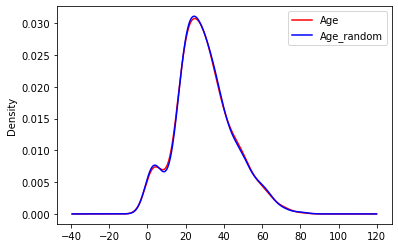

In [149]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='red')
df['Age_random'].plot(kind='kde', ax=ax, color='blue')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages and Disadvantages of Random Sample Imputation
#### Advantages
1. Easy to implement
2. There is less disortion in variance

#### Disadvantages
1. Every situation randomness won't work

### 3.Capturing NAN values with new feature

In [150]:
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [151]:
import numpy as np
df['Age_nan'] = np.where(df['Age'].isnull(),1,0)
df.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [152]:
df.Age.median()

28.0

In [153]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [154]:
df.head(10)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


### Advantages and Disadvantages of Capturing NAN values with new feature
#### Advantages
1. Easy to implement
2. Capture the importance of missing values

#### Disadvantages
1. Creating additional features (Curse of Dimensionality)

### 4.End of Distribution Imputation

In [155]:
df = pd.read_csv('titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


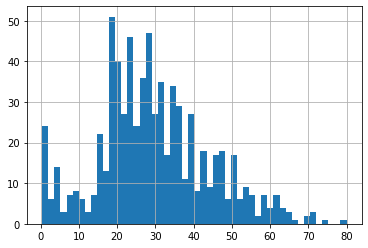

In [156]:
df.Age.hist(bins=50)

In [157]:
extreme = df.Age.mean()+3*df.Age.std()

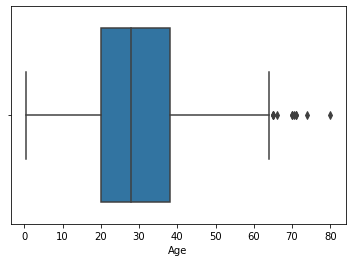

In [158]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [159]:
def impute_nan2(df,variable,median,extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median,inplace= True)

In [160]:
impute_nan2(df,'Age',df.Age.median(),extreme)

In [161]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


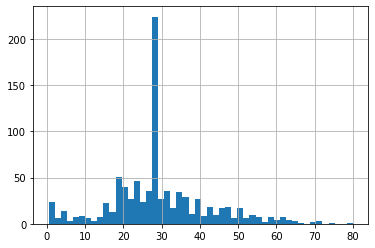

In [162]:
df['Age'].hist(bins=50)

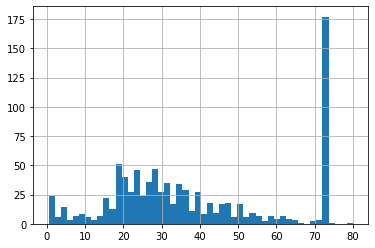

In [163]:
df['Age_end_distribution'].hist(bins=50)

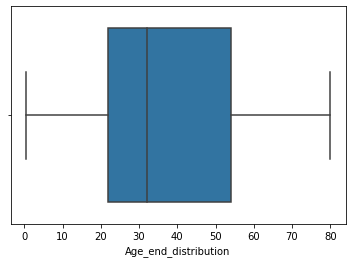

In [164]:
sns.boxplot('Age_end_distribution',data=df)

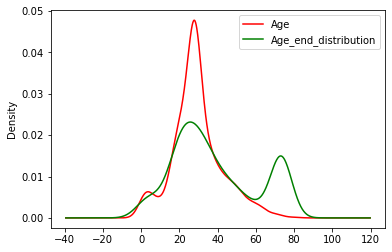

In [167]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color='red')
df['Age_end_distribution'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages and Disadvantages of End of Distribution Imputation
#### Advantages
1. Easy to implement
2. Captures the importance of missingness if any.

#### Disadvantages
1. Distorts the orginal distribution of variable
2. If the missingness is not important, it may mask the predictive power of the orginal variable by distorting it's      ditribution.
3. If the number of NA is big, it will mask the true outliers in the distribution.
4. If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent feature engineering.
